In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import numpy as np

In [502]:
df_validation = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march.csv', delimiter=',', skiprows=0, low_memory=False)

In [507]:
# Remove rows with negative validation data
df_validation=df_validation.loc[df_validation['gallons']>0]

In [549]:
df_validation

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
0,2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,,,
1,2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,,,
2,1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,,,
3,1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,,,
4,2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,,,
...,...,...,...,...,...,...,...,...,...
3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,,,
3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,,,
3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,,,
3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,,,


In [509]:
df_validation.sort_values(by=['equipment_id','timestamp'], inplace=True)

In [510]:
df_validation.drop(['Unnamed: 0'], axis=1, inplace=True)

In [511]:
#df_validation

In [512]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [513]:
#df_model
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)

In [514]:
#df_model

In [515]:
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [516]:
df_validation.rename(columns={"timestamp": "ServiceDateTime","equipment_id":"Vehicle"}, inplace=True)

In [517]:
df_validation_vehicles=df_validation['Vehicle'].unique()

In [518]:
df_model_vehicles=df_model['Vehicle'].unique()

In [519]:
#df_validation.head(100)

In [520]:
df_validation["dist"] = ""
df_validation["Energy"] = ""
df_validation["VehicleModel"] = ""

In [521]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [522]:
df_validation['ServiceDateTime'] = pd.to_datetime(df_validation['ServiceDateTime'])

In [523]:
df_model['ServiceDateTime']=pd.to_datetime(df_model['ServiceDateTime'])

In [524]:
df_validation['ServiceDateTime']=pd.to_datetime(df_validation['ServiceDateTime'])

In [525]:
df_validation.dtypes

ServiceDateTime    datetime64[ns]
Vehicle                     int64
gallons                   float64
date                       object
Powertrain                 object
dist                       object
Energy                     object
VehicleModel               object
dtype: object

In [526]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'])

,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,,,
2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,,,
1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,,,
1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,,,
2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,,,
...,...,...,...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,,,
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,,,
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,,,
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,,,


In [527]:
df_validation=df_validation.reset_index()

In [528]:
df_validation.head(20)

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
0,2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,,,
1,2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,,,
2,1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,,,
3,1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,,,
4,2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,,,
5,68,2022-03-31 19:33:00,1322,0.49,2022-03-31,electric,,,
6,1788,2022-04-18 19:48:00,1322,0.50,2022-04-18,electric,,,
7,1789,2022-04-18 19:49:00,1322,0.46,2022-04-18,electric,,,
8,2809,2022-04-28 19:30:00,1322,0.51,2022-04-28,electric,,,
9,173,2022-04-01 18:59:00,1323,0.53,2022-04-01,electric,,,


In [529]:
df_integrated_diesel = df_validation[(df_validation.Powertrain != 'electric')]

In [530]:
df_integrated_diesel=df_integrated_diesel.reset_index()

In [531]:
for i in df_integrated_diesel.index:
    if i==0:
        pass 
    else:
        if df_integrated_diesel['Vehicle'][i]==df_integrated_diesel['Vehicle'][i-1]:
            start=df_integrated_diesel['ServiceDateTime'][i-1]
            end=df_integrated_diesel['ServiceDateTime'][i]
            df_filtered=df_model.loc[(df_model['Vehicle']==df_integrated_diesel['Vehicle'][i])&(df_integrated_diesel['ServiceDateTime'][i-1]<df_model['ServiceDateTime'])&(df_model['ServiceDateTime']<df_integrated_diesel['ServiceDateTime'][i])]
            df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
            df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
            df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
        else:
            pass

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'][i]=df_filtered['Energy'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['VehicleModel'][i]=df_filtered['VehicleModel'].mode()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'][i]=df_filtered['dist'].sum()
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\3405910616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [532]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
0,44,84,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,,,
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,20.153101,"0 Gillig 35 Name: VehicleModel, dtype: object"
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,18.556534,"0 Gillig 35 Name: VehicleModel, dtype: object"
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,39.650908,"0 Gillig 35 Name: VehicleModel, dtype: object"
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,27.703812,"0 Gillig 35 Name: VehicleModel, dtype: object"
...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,21.282551,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,15.550862,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,25.434447,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,62.013749,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...


In [533]:
df_integrated_diesel = df_integrated_diesel[df_integrated_diesel['Energy']!='']

In [534]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,20.153101,"0 Gillig 35 Name: VehicleModel, dtype: object"
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,18.556534,"0 Gillig 35 Name: VehicleModel, dtype: object"
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,39.650908,"0 Gillig 35 Name: VehicleModel, dtype: object"
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,27.703812,"0 Gillig 35 Name: VehicleModel, dtype: object"
5,49,749,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,166.541198,36.262789,"0 Gillig 35 Name: VehicleModel, dtype: object"
...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,21.282551,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,15.550862,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,25.434447,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,62.013749,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...


In [535]:
df_integrated_diesel['dist'] = df_integrated_diesel['dist'].astype(float)
df_integrated_diesel['Energy'] = df_integrated_diesel['Energy'].astype(float)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\858975720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'] = df_integrated_diesel['dist'].astype(float)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\858975720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'] = df_integrated_diesel['Energy'].astype(float)


In [536]:
df_integrated_diesel=df_integrated_diesel[df_integrated_diesel['Energy']!=0]

In [537]:
df_hybrid=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'conventional'].copy()

In [538]:
rmse_conventional = mean_squared_error(df_conventional['gallons'], df_conventional['Energy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['gallons'], df_hybrid['Energy'], squared=False)
MAPE_conventional = np.mean(np.abs((df_conventional['gallons'] - df_conventional['Energy']) / df_conventional['gallons'])) * 100
MAPE_hybrid = np.mean(np.abs((df_hybrid['gallons'] - df_hybrid['Energy']) / df_hybrid['gallons'])) * 100

In [539]:
rmse_conventional

9.058187383500083

In [540]:
MAPE_conventional

47.31284947714858

In [541]:
rmse_hybrid

9.172425367604458

In [542]:
MAPE_hybrid

34.09289573541264

In [543]:
df_conventional.dtypes

level_0                     int64
index                       int64
ServiceDateTime    datetime64[ns]
Vehicle                     int64
gallons                   float64
date                       object
Powertrain                 object
dist                      float64
Energy                    float64
VehicleModel               object
dtype: object

In [544]:
df_conventional['residual']=df_conventional['gallons']-df_conventional['Energy']

In [545]:
df_conventional.nlargest(20,['residual'])

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,residual
302,346,678,2022-04-06 21:51:00,1619,57.05,2022-04-06,conventional,7.451466,1.739755,"0 Gillig 40 Name: VehicleModel, dtype: object",55.310245
585,629,1444,2022-04-14 19:29:00,1661,70.63,2022-04-14,conventional,146.833040,29.692098,"0 Gillig 40 Name: VehicleModel, dtype: object",40.937902
593,637,2688,2022-04-27 19:31:00,1661,69.42,2022-04-27,conventional,152.845814,30.303746,"0 Gillig 40 Name: VehicleModel, dtype: object",39.116254
2237,2281,240,2022-04-02 00:29:00,3310,70.40,2022-04-02,conventional,88.179157,32.355830,"0 Gillig 35 Name: VehicleModel, dtype: object",38.044170
546,590,1686,2022-04-16 21:59:00,1657,67.85,2022-04-16,conventional,159.392757,32.578219,"0 Gillig 40 Name: VehicleModel, dtype: object",35.271781
1612,1656,1378,2022-04-13 23:42:00,1841,47.18,2022-04-13,conventional,42.533680,12.965696,"0 NEW FLYER XD40 Name: VehicleModel, dtype:...",34.214304
2280,2324,120,2022-04-01 00:28:00,3312,35.20,2022-04-01,conventional,3.311691,1.059795,"0 Gillig 35 Name: VehicleModel, dtype: object",34.140205
436,480,1887,2022-04-19 19:32:00,1652,63.51,2022-04-19,conventional,157.669557,31.085208,"0 Gillig 40 Name: VehicleModel, dtype: object",32.424792
2480,2524,119,2022-04-01 00:19:00,3322,31.70,2022-04-01,conventional,3.808398,1.037685,"0 NEW FLYER XD40 Name: VehicleModel, dtype:...",30.662315
343,387,1220,2022-04-12 19:35:00,1643,59.15,2022-04-12,conventional,142.827627,29.502992,"0 Gillig 40 Name: VehicleModel, dtype: object",29.647008


In [546]:
df_conventional.nsmallest(20,['residual'])

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,residual
915,959,808,2022-04-07 23:15:00,1722,0.45,2022-04-07,conventional,196.805230,56.000681,"0 NEW FLYER XD35 Name: VehicleModel, dtype:...",-55.550681
598,642,733,2022-04-07 16:04:00,1662,43.48,2022-04-07,conventional,103.110207,86.642712,"0 Gillig 40 Name: VehicleModel, dtype: object",-43.162712
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,62.013749,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...,-43.013749
3012,3061,2177,2022-04-22 05:54:00,7902,15.00,2022-04-22,conventional,88.987692,55.570408,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...,-40.570408
2815,2864,604,2022-04-06 05:30:00,7802,14.00,2022-04-06,conventional,92.111201,50.890902,"0 NEW FLYER XD40 Name: VehicleModel, dtype:...",-36.890902
2923,2972,2519,2022-04-26 05:52:00,7814,14.10,2022-04-26,conventional,87.635194,50.006181,"0 NEW FLYER XD40 Name: VehicleModel, dtype:...",-35.906181
2550,2594,1696,2022-04-17 05:57:00,3325,8.90,2022-04-17,conventional,29.433979,44.467720,"0 NEW FLYER XD40 Name: VehicleModel, dtype:...",-35.567720
2816,2865,718,2022-04-07 05:55:00,7802,20.10,2022-04-07,conventional,93.830969,51.870548,"0 NEW FLYER XD40 Name: VehicleModel, dtype:...",-31.770548
2136,2180,606,2022-04-06 10:46:00,3302,38.80,2022-04-06,conventional,198.074560,69.963602,"0 Gillig 40 Name: VehicleModel, dtype: object",-31.163602
2349,2393,2066,2022-04-21 04:41:00,3316,18.10,2022-04-21,conventional,60.664383,48.897651,"0 Gillig 40 Name: VehicleModel, dtype: object",-30.797651


In [552]:
df_validation.loc[(df_validation['Vehicle']==7661)&(df_validation['date']=='2022-04-20')]

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
2808,2019,2022-04-20 20:59:00,7661,49.4,2022-04-20,conventional,,,
2809,2020,2022-04-20 20:59:00,7661,59.4,2022-04-20,conventional,,,


In [554]:
df_conventional

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,residual
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,20.153101,"0 Gillig 35 Name: VehicleModel, dtype: object",7.276899
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,18.556534,"0 Gillig 35 Name: VehicleModel, dtype: object",14.593466
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,39.650908,"0 Gillig 35 Name: VehicleModel, dtype: object",12.639092
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,27.703812,"0 Gillig 35 Name: VehicleModel, dtype: object",8.986188
5,49,749,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,166.541198,36.262789,"0 Gillig 35 Name: VehicleModel, dtype: object",9.347211
...,...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,21.282551,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...,3.317449
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,15.550862,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...,-3.350862
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,25.434447,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...,-1.634447
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,62.013749,0 NEW FLYER XDE60 (ARTIC) Name: VehicleMode...,-43.013749


In [558]:
df_conventional_plot = df_conventional.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

In [559]:
df_conventional_plot

,date,gallons,Energy
0,2022-04-01,2318.19,2304.145008
1,2022-04-02,2034.05,2190.264527
2,2022-04-03,908.60,1016.466691
3,2022-04-04,3056.31,3195.920578
4,2022-04-05,3248.56,3406.424053
5,2022-04-06,3083.71,3290.436991
6,2022-04-07,3085.42,3248.331542
7,2022-04-08,2938.26,3167.261095
8,2022-04-09,1995.33,2155.390598
9,2022-04-10,882.93,927.955619


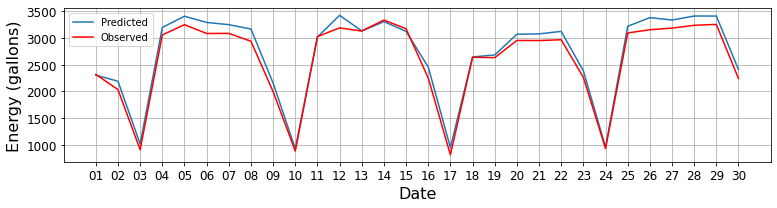

In [561]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_conventional_plot.date, df_conventional_plot.Energy, label='Predicted')
fig=plt.plot(df_conventional_plot.gallons, label='Observed', color='red')
#fig=plt.plot(df_daily_energy_validation_CDB.date, df_daily_energy_validation_CDB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.grid()

#plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [562]:
df_hybrid_plot = df_hybrid.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

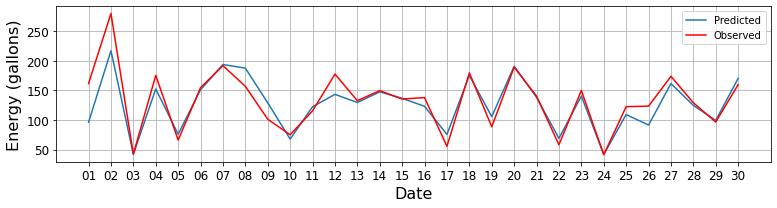

In [563]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_hybrid_plot.date, df_hybrid_plot.Energy, label='Predicted')
fig=plt.plot(df_hybrid_plot.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

#plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 